In [13]:
# load dataset

import BEVdataset

root = "dataset/CityUHK-X-BEV-master/CityUHK-X-BEV"

train_key = 'train'
test_key = 'test'
all_key = 'all'

valid_ratio = 0.2
keys = ['image', 'head_map', 'feet_map', 'bev_map', 'camera_height', 'camera_angle', 'camera_fu', 'camera_fv']
use_augment = True

datalist = BEVdataset.load_datalist(root, True)
# print(datalist[train_key])
num_train = len(datalist[train_key]) * (1 - valid_ratio)
num_train = int(num_train)

train_datalist = datalist[train_key][:num_train]
valid_datalist = datalist[train_key][num_train:]
test_datalist = datalist[test_key]

train_dataset = BEVdataset.CityUHKBEV(root, train_datalist, keys, use_augment=True)
valid_dataset = BEVdataset.CityUHKBEV(root, valid_datalist, keys, use_augment=False)
test_dataset = BEVdataset.CityUHKBEV(root, test_datalist, keys, use_augment=False)

print(len(train_dataset))

2027


image_id tensor(18.)
scene_id tensor(6.)
camera_fv tensor(468.1444)
camera_angle tensor(1.1362)
camera_height tensor(15.6000)
camera_fu tensor(464.7012)


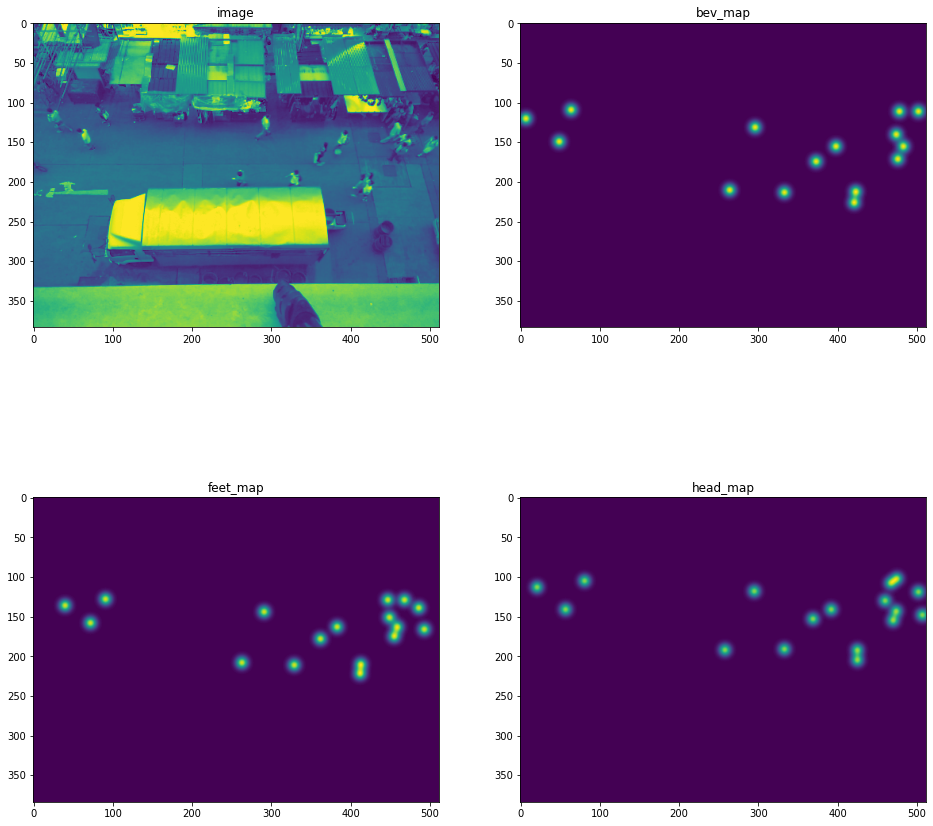

In [22]:
import matplotlib.pyplot as plt
import numpy as np

image_keys = ['image', 'bev_map', 'feet_map', 'head_map']
size = 8

fig = plt.figure(figsize=(2 * size, 2 * size))
for batch in train_dataset:
	# should return a dict of result to use
	# print(batch)
	i = 1
	for k, v in batch.items():
		if k in image_keys:
			# print(k)
			img = v.numpy()
			img = np.transpose(img, (1, 2, 0))
			img = img[:,:,-1::]
			ax1 = fig.add_subplot(2, 2, i)
			i += 1
			ax1.imshow(img)
			ax1.set_title(k)
		else:
			print(k, v)

	break

In [ ]:
import posenet

model = posenet.PoseNet("resnet101", True)